# Differentiation score over time

In [2]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import os
sys.path.append('/sise/home/shakarch/muscle-formation-regeneration')
sys.path.append(os.path.abspath('..'))

from TimeSeriesAnalysis.utils.data_load_save import *
import TimeSeriesAnalysis.consts as consts
import TimeSeriesAnalysis.params as params

In [3]:
def get_diff_scores_df(modality, con_train_vid_num, diff_train_vid_num, scores_vid_num):
    dir_path = consts.intensity_model_path if modality == "actin_intensity" else consts.motility_model_path
    dir_path = dir_path % (con_train_vid_num, diff_train_vid_num)
    scores_data_path = dir_path + f"df_score_vid_num_S{scores_vid_num}.pkl"
    scores_df = pickle.load(open(scores_data_path, 'rb'))
    return scores_df

In [10]:
score_df_mot_s2_train_1_5 = get_diff_scores_df("motility", 1, 5, 2)
score_df_mot_s3_train_1_5 = get_diff_scores_df("motility", 1, 5, 3)
# score_df_mot_s6_train_1_5 = get_diff_scores_df("motility", 1, 5, 6)
# score_df_mot_s8_train_1_5 = get_diff_scores_df("motility", 1, 5, 8)

# score_df_mot_s6_train_2_3 = get_diff_scores_df("motility", 2, 3, 6)
# score_df_mot_s8_train_2_3 = get_diff_scores_df("motility", 2, 3, 8)
score_df_mot_s1_train_2_3 = get_diff_scores_df("motility", 2, 3, 1)
score_df_mot_s5_train_2_3 = get_diff_scores_df("motility", 2, 3, 5)

score_df_int_s6_train_1_5 = get_diff_scores_df("actin_intensity", 1, 5, 6)
score_df_int_s8_train_1_5 = get_diff_scores_df("actin_intensity", 1, 5, 8)
score_df_int_s2_train_1_5 = get_diff_scores_df("actin_intensity", 1, 5, 2)
score_df_int_s3_train_1_5 = get_diff_scores_df("actin_intensity", 1, 5, 3)

score_df_int_s6_train_2_3 = get_diff_scores_df("actin_intensity", 2, 3, 6)
score_df_int_s8_train_2_3 = get_diff_scores_df("actin_intensity", 2, 3, 8)
score_df_int_s1_train_2_3 = get_diff_scores_df("actin_intensity", 2, 3, 1)
score_df_int_s5_train_2_3 = get_diff_scores_df("actin_intensity", 2, 3, 5)

FileNotFoundError: [Errno 2] No such file or directory: '/storage/users/assafzar/Muscle_Differentiation_AvinoamLab/15-12-2022-motility local dens-False, s2, s3 train [130, 160] diff window/track len 30, impute_func-ImputeAllData_impute_zeroes reg MeanOpticalFlowReg_/df_score_vid_num_S1.pkl'

In [ ]:
score_df_mot_s11_train_1_5 = get_diff_scores_df("motility", 1, 5, "1 ck666")
score_df_mot_s44_train_1_5 = get_diff_scores_df("motility", 1, 5, "4 ck666")
score_df_mot_s55_train_1_5 = get_diff_scores_df("motility", 1, 5, "5 ck666")

score_df_int_s11_train_1_5 = get_diff_scores_df("actin_intensity", 1, 5, "1 ck666")
score_df_int_s44_train_1_5 = get_diff_scores_df("actin_intensity", 1, 5, "4 ck666")
score_df_int_s55_train_1_5 = get_diff_scores_df("actin_intensity", 1, 5, "5 ck666")

In [ ]:
score_df_mot_s3_train_1_5.drop("Spot track ID", axis=1)

In [5]:
def plot_avg_conf(conf_data, mot_int, path="", plot_std=True, frames=(0,260), xlim=(2.5, 24)):
    fig = plt.figure(figsize=(12, 9))
    def plot(df, color1, color2, label, frames):
        avg_vals_diff = ([df[col].mean() for col in df.columns])
        std_vals_diff = ([df[col].std() for col in df.columns])
        print(np.mean(avg_vals_diff[60:84]))
        p_std = np.asarray(avg_vals_diff) + np.asarray(std_vals_diff)
        m_std = np.asarray(avg_vals_diff) - np.asarray(std_vals_diff)
        plt.plot([i * 5 / 60 for i in df.columns], avg_vals_diff, color=color1, label=label)
        if plot_std:
            plt.fill_between([i * 5 / 60 for i in df.columns], m_std, p_std, alpha=0.4, color=color2)
    
    plt.axvspan(frames[0] * 5 / 60, frames[1] * 5 / 60, alpha=0.6, color='lightgray')
    plt.axvline(frames[0] * 5 / 60, color='gray', linestyle='dashed')
    plt.axvline(frames[1] * 5 / 60, color='gray', linestyle='dashed')
    
    for (df, label, avg_color, std_color) in conf_data:
        plot(df, avg_color, std_color, label, frames)
        
#     plt.legend()
    plt.grid(False)
    plt.xlabel("time (h)")
    plt.ylabel("avg score")
    plt.title(f"avg differentiation score over time ({mot_int})")
    plt.plot([i * 5 / 60 for i in df.columns], [0.5 for i in df.columns], color="black", linestyle="--")
#     plt.yticks(np.arange(0, 0.4, step=0.2)) 
    plt.ylim((-0.1,1.1))
    plt.xlim(xlim)
    plt.savefig(path + '.eps', format='eps')
    plt.show()
    plt.clf()
    
fig_dir_path = fr"/storage/users/assafzar/Muscle_Differentiation_AvinoamLab/eps_figs/"

In [6]:
data_1_5_train  = [(score_df_mot_s3_train_1_5.drop("Spot track ID", axis=1), "ERKi", "DarkOrange","Orange"),
         (score_df_mot_s2_train_1_5.drop("Spot track ID", axis=1), "DMSO", "blue", "blue"),]


plot_avg_conf(data_1_5_train, "motility", path=fig_dir_path + "avg diff over time train (1,5) test (2,3) motility", plot_std=True, frames=(72,156))

NameError: name 'score_df_mot_s3_train_1_5' is not defined

avg differentiation score over time:
* motility features
* experiment: 211212_CD7_ERK_P38
* train set: 
    * control- s1
    * ERK- s5
* displayed data:
    * control- s2
    * ERK- s3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.558431315843326
0.31677340619816685


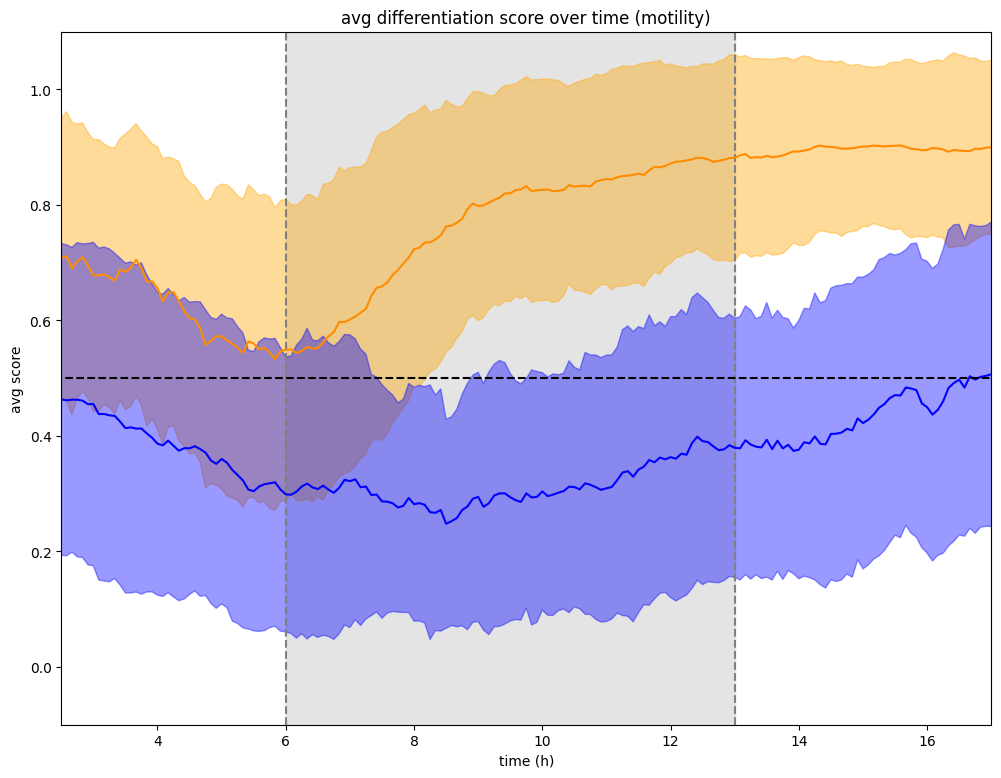

<Figure size 640x480 with 0 Axes>

In [37]:
data_2_3_train  = [(score_df_mot_s5_train_2_3.drop("Spot track ID", axis=1), "ERKi", "DarkOrange","Orange"),
         (score_df_mot_s1_train_2_3.drop("Spot track ID", axis=1), "DMSO", "blue", "blue"),]
plot_avg_conf(data_2_3_train, "motility", path=fig_dir_path + "avg diff over time train (2,3) test (1,5) motility", plot_std=True, frames=(72,156), xlim=(2.5, 17))

avg differentiation score over time:

* motility features
* experiment: 211212_CD7_ERK_P38
* train set:
    * control- s2
    * ERK- s3
* displayed data:
    * control- s1
    * ERK- s5

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.20896874061394746
0.08400354506604507


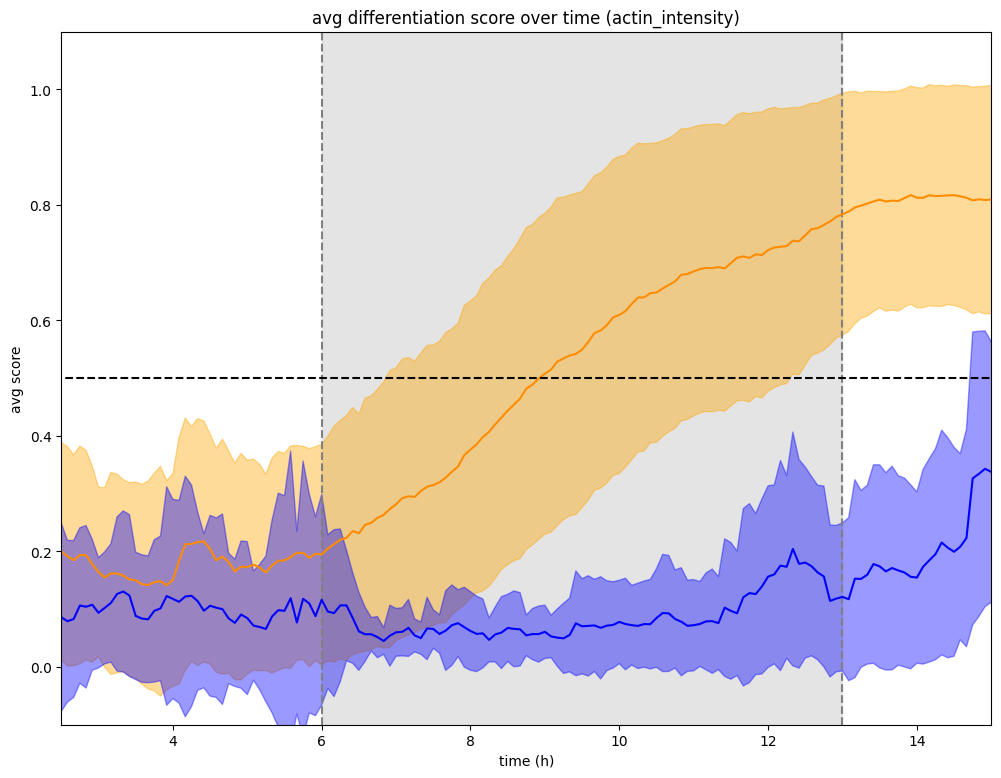

<Figure size 640x480 with 0 Axes>

In [28]:
data_1_5_train  = [(score_df_int_s3_train_1_5.drop("Spot track ID", axis=1), "ERK", "DarkOrange","Orange"),
         (score_df_int_s2_train_1_5.drop("Spot track ID", axis=1), "DMSO", "blue", "blue"),]

plot_avg_conf(data_1_5_train, "actin_intensity", path=fig_dir_path + "avg diff over time train (1,5) test (2,3) intensity", plot_std=True, frames=(72,156))

avg differentiation score over time:

* actin intensity features
* window size: 30 px
* experiment: 211212_CD7_ERK_P38
* train set:
    * control- s1
    * ERK- s5
* displayed data:
    * control- s2
    * ERK- s3

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.3079803058328521
0.18136805057718905


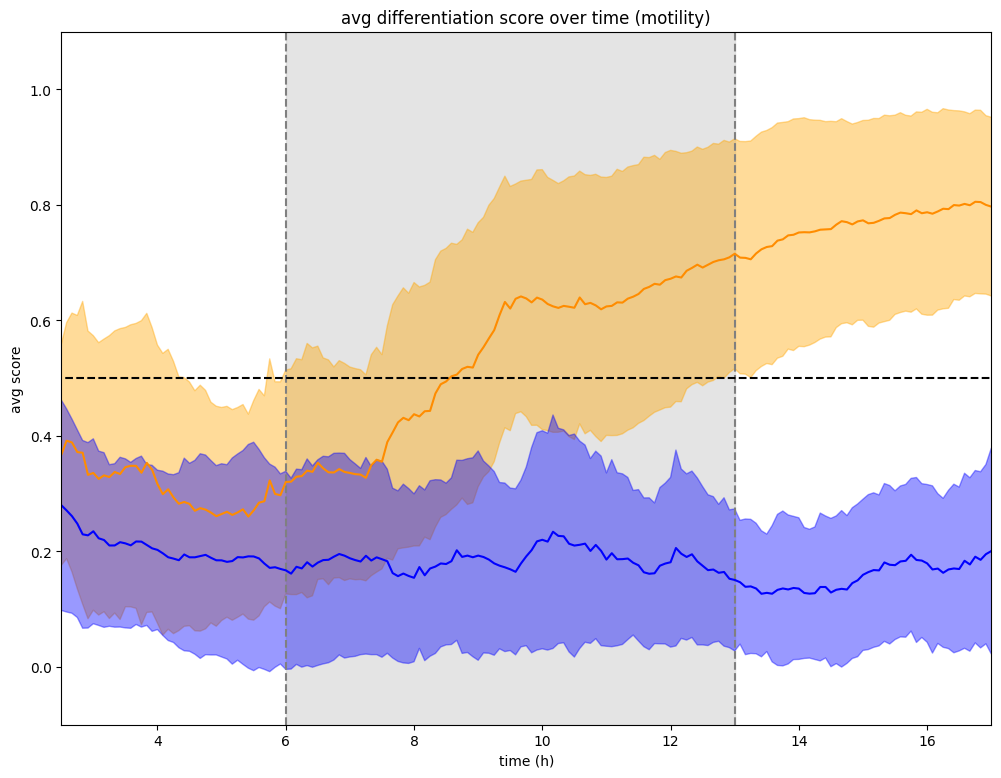

<Figure size 640x480 with 0 Axes>

In [36]:
data_2_3_train  = [(score_df_int_s5_train_2_3.drop("Spot track ID", axis=1), "ERKi", "DarkOrange","Orange"),
         (score_df_int_s1_train_2_3.drop("Spot track ID", axis=1), "DMSO", "blue", "blue"),]
plot_avg_conf(data_2_3_train, "motility", path=fig_dir_path + "avg diff over time train (2,3) test (1,5) intensity", plot_std=True, frames=(72,156), xlim=(2.5, 17))

0.20896874061394746
0.08400354506604507


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.195975111674957
0.1361560478332152


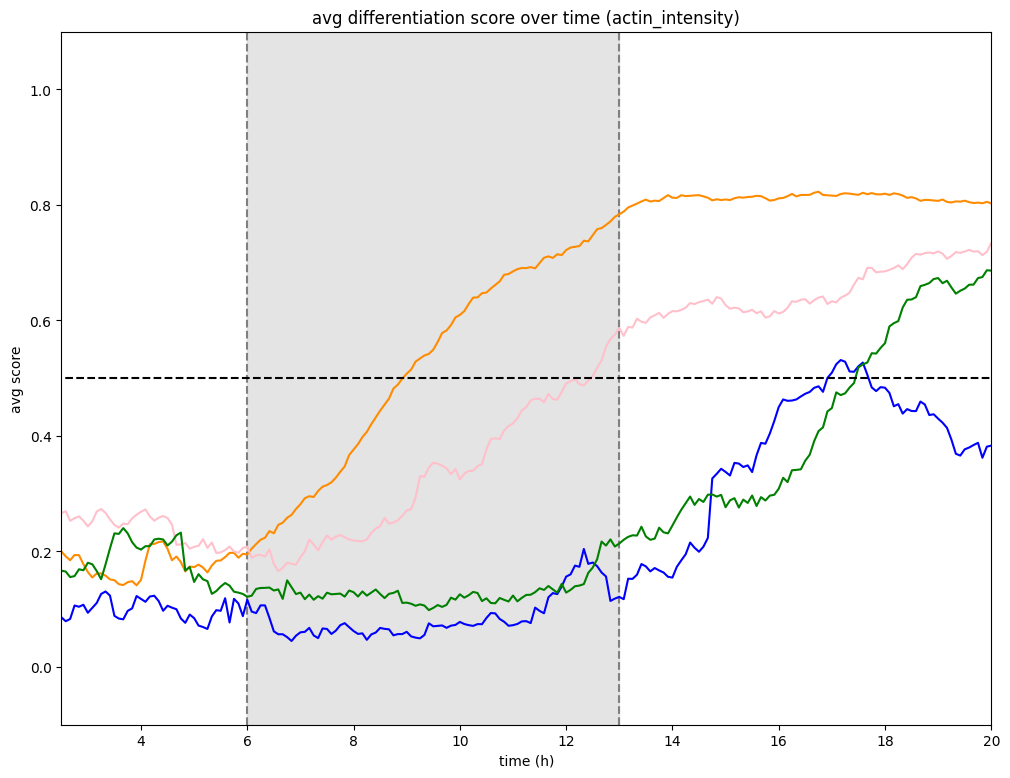

<Figure size 640x480 with 0 Axes>

In [40]:
data_1_5_train  = [(score_df_int_s3_train_1_5.drop("Spot track ID", axis=1), "ERK", "DarkOrange","Orange"),
         (score_df_int_s2_train_1_5.drop("Spot track ID", axis=1), "DMSO", "blue", "blue"),
                   (score_df_int_s6_train_1_5.drop("Spot track ID", axis=1), "DMSO", "pink", "pink"),
                   (score_df_int_s8_train_1_5.drop("Spot track ID", axis=1), "DMSO", "green", "green"),
                  ]

plot_avg_conf(data_1_5_train, "actin_intensity", path=fig_dir_path + "avg diff over time train (1,5) test (2,3, 6, 8) intensity", plot_std=False, frames=(72,156), xlim=(2.5, 20))

0.2671373949869597
0.08631419968919969


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.18393165158321434
0.051269975517159894


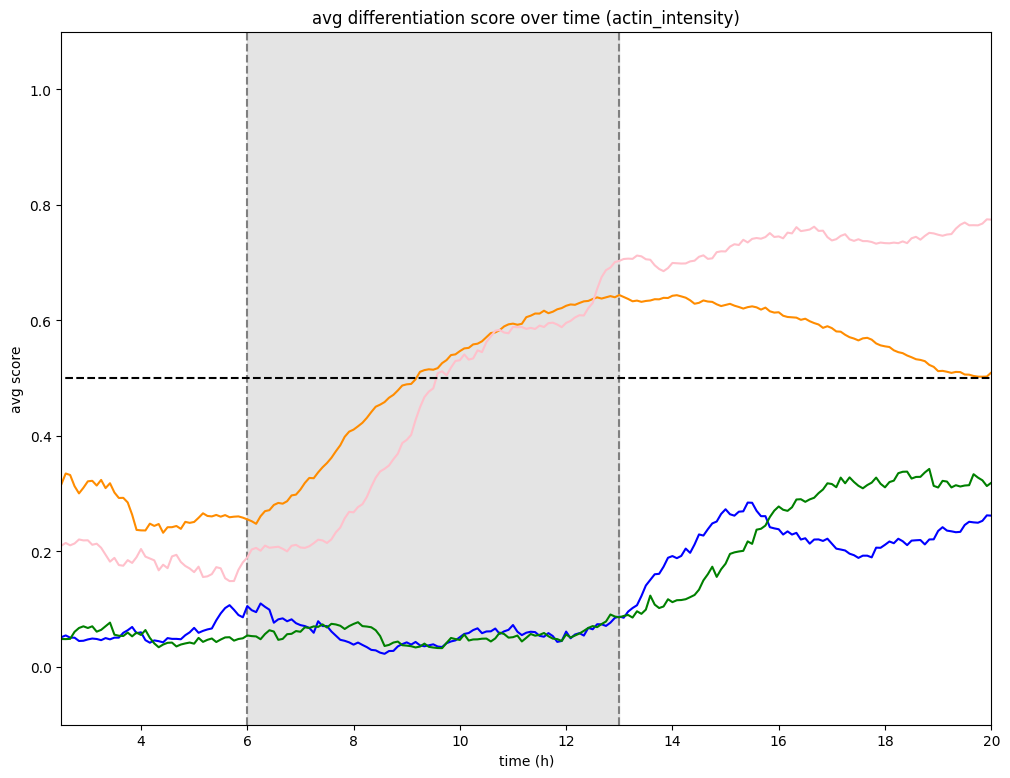

<Figure size 640x480 with 0 Axes>

In [41]:
data_1_5_train  = [(score_df_mot_s3_train_1_5.drop("Spot track ID", axis=1), "ERK", "DarkOrange","Orange"),
                 (score_df_mot_s2_train_1_5.drop("Spot track ID", axis=1), "DMSO", "blue", "blue"),
                   (score_df_mot_s6_train_1_5.drop("Spot track ID", axis=1), "DMSO", "pink", "pink"),
                   (score_df_mot_s8_train_1_5.drop("Spot track ID", axis=1), "DMSO", "green", "green"),
                  ]

plot_avg_conf(data_1_5_train, "actin_intensity", path=fig_dir_path + "avg diff over time train (1,5) test (2,3, 6, 8) motility", plot_std=False, frames=(72,156), xlim=(2.5, 20))

avg differentiation score over time:

* actin intensity features
* experiment: 211212_CD7_ERK_P38
* train set:
    * control- s2
    * ERK- s3
* displayed data:
    * control- s1
    * ERK- s5

In [ ]:
data_1_5_train  = [(int_scores_df_ck666_s1.drop("Spot track ID", axis=1), "Control", "blue","blue"),
                (int_scores_df_ck666_s4.drop("Spot track ID", axis=1), "ERKi", "DarkOrange", "Orange"),
                (int_scores_df_ck666_s5.drop("Spot track ID", axis=1), "ERK ck666", "green", "green"),
                  (int_score_df_s6_train_1_5.drop("Spot track ID", axis=1), "ERK p38", "pink", "pink"),]


plot_avg_conf(data_1_5_train, "actin_intensity", path="" + "avg diff over time train (1,5) ck666 actin_intensity", plot_std=False, frames=(0,258))

In [25]:
int_scores_df_ck666_s1 = pickle.load(open("/home/shakarch/30-07-2022-actin_intensity local dens-False, s1, s5 train win size 16/track len 30, impute_func-ImputeAllData_impute_zeroes reg reg_MeanOpticalFlowRegistration_/df_prob_w=30, video_num=1 ck666", 'rb'))
int_scores_df_ck666_s4 = pickle.load(open("/home/shakarch/30-07-2022-actin_intensity local dens-False, s1, s5 train win size 16/track len 30, impute_func-ImputeAllData_impute_zeroes reg reg_MeanOpticalFlowRegistration_/df_prob_w=30, video_num=4 ck666", 'rb'))
int_scores_df_ck666_s5 = pickle.load(open("/home/shakarch/30-07-2022-actin_intensity local dens-False, s1, s5 train win size 16/track len 30, impute_func-ImputeAllData_impute_zeroes reg reg_MeanOpticalFlowRegistration_/df_prob_w=30, video_num=5 ck666", 'rb'))
int_score_df_s6_train_1_5 =  pickle.load(open("/home/shakarch/30-07-2022-actin_intensity local dens-False, s1, s5 train win size 16/track len 30, impute_func-ImputeAllData_impute_zeroes reg reg_MeanOpticalFlowRegistration_/df_prob_w=30, video_num=6", 'rb'))
int_score_df_s8_train_1_5 =  pickle.load(open("/home/shakarch/30-07-2022-actin_intensity local dens-False, s1, s5 train win size 16/track len 30, impute_func-ImputeAllData_impute_zeroes reg reg_MeanOpticalFlowRegistration_/df_prob_w=30, video_num=8", 'rb'))


mot_scores_df_ck666_s1 = pickle.load(open("/home/shakarch/30-07-2022-motility local dens-False, s1, s5 train/track len 30, impute_func-ImputeAllData_impute_zeroes reg reg_MeanOpticalFlowRegistration_/df_prob_w=30, video_num=1 ck666", 'rb'))
mot_scores_df_ck666_s4 = pickle.load(open("/home/shakarch/30-07-2022-motility local dens-False, s1, s5 train/track len 30, impute_func-ImputeAllData_impute_zeroes reg reg_MeanOpticalFlowRegistration_/df_prob_w=30, video_num=4 ck666", 'rb'))
mot_scores_df_ck666_s5 = pickle.load(open("/home/shakarch/30-07-2022-motility local dens-False, s1, s5 train/track len 30, impute_func-ImputeAllData_impute_zeroes reg reg_MeanOpticalFlowRegistration_/df_prob_w=30, video_num=5 ck666", 'rb'))
mot_score_df_s6_train_1_5 =  pickle.load(open("/home/shakarch/30-07-2022-motility local dens-False, s1, s5 train/track len 30, impute_func-ImputeAllData_impute_zeroes reg reg_MeanOpticalFlowRegistration_/df_prob_w=30, video_num=6", 'rb'))
mot_score_df_s8_train_1_5 =  pickle.load(open("/home/shakarch/30-07-2022-motility local dens-False, s1, s5 train/track len 30, impute_func-ImputeAllData_impute_zeroes reg reg_MeanOpticalFlowRegistration_/df_prob_w=30, video_num=8", 'rb'))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


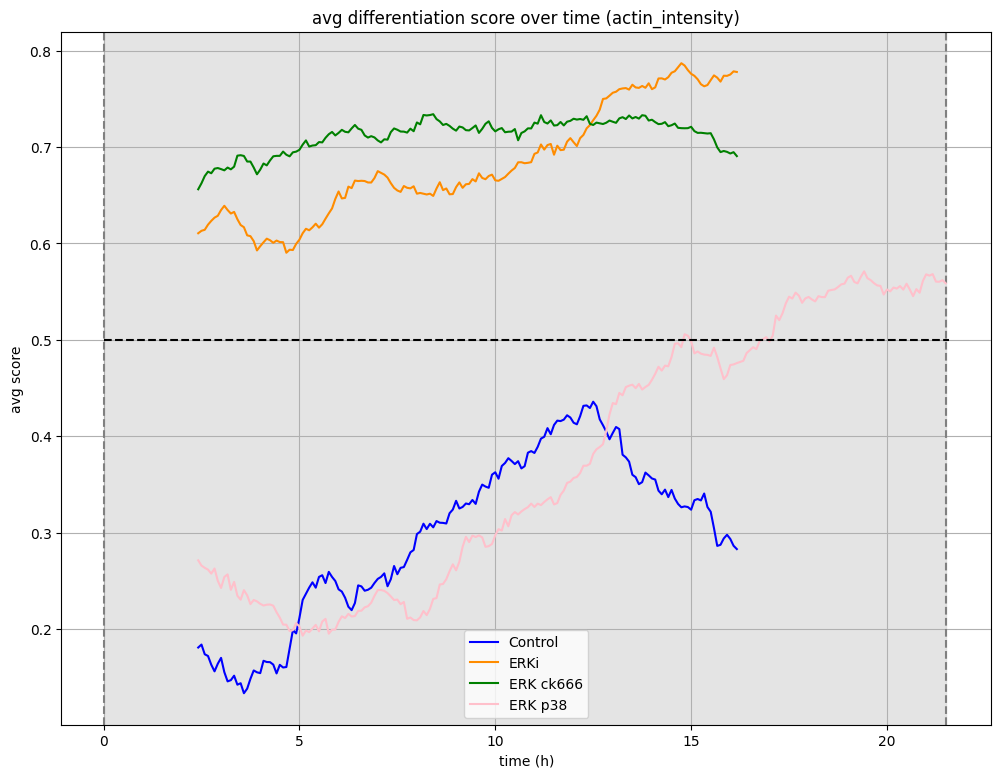

<Figure size 640x480 with 0 Axes>

In [23]:
data_1_5_train  = [(int_scores_df_ck666_s1.drop("Spot track ID", axis=1), "Control", "blue","blue"),
                (int_scores_df_ck666_s4.drop("Spot track ID", axis=1), "ERKi", "DarkOrange", "Orange"),
                (int_scores_df_ck666_s5.drop("Spot track ID", axis=1), "ERK ck666", "green", "green"),
                  (int_score_df_s6_train_1_5.drop("Spot track ID", axis=1), "ERK p38", "pink", "pink"),]


plot_avg_conf(data_1_5_train, "actin_intensity", path="" + "avg diff over time train (1,5) ck666 actin_intensity", plot_std=False, frames=(0,258))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


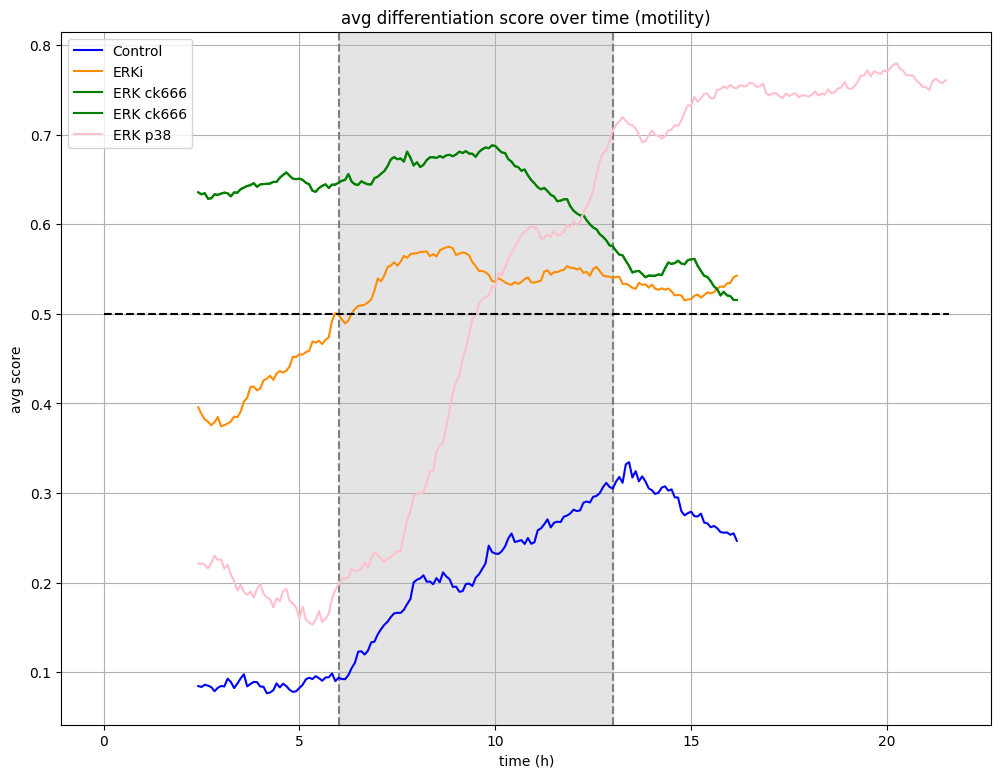

<Figure size 640x480 with 0 Axes>

In [26]:
data_1_5_train  = [(mot_scores_df_ck666_s1.drop("Spot track ID", axis=1), "Control", "blue","blue"),
                (mot_scores_df_ck666_s4.drop("Spot track ID", axis=1), "ERKi", "DarkOrange", "Orange"),
                (mot_scores_df_ck666_s5.drop("Spot track ID", axis=1), "ERK ck666", "green", "green"),
                (mot_scores_df_ck666_s5.drop("Spot track ID", axis=1), "ERK ck666", "green", "green"),
                (mot_score_df_s6_train_1_5.drop("Spot track ID", axis=1), "ERK p38", "pink", "pink"),]


plot_avg_conf(data_1_5_train, "motility", path="" + "avg diff over time train (1,5) ck666 motility", plot_std=False, frames=(72,156))